In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix , ConfusionMatrixDisplay,roc_curve,roc_auc_score,precision_score, recall_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv('Passenger_Satisfaction.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.shape


(103904, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
# drop the Unamned , id column since it adds no value for our model training
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [7]:
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

### Dealing with missing value in Arrival Delay in Minutes Column

In [8]:
#Dealing with missing value in Arrival Delay in Minutes Column
df["Arrival Delay in Minutes"].isna().sum()

310

In [9]:
df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].mean() , inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.640909
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [12]:
df.describe(include=['O'])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [13]:
cor = df.corr(numeric_only=True)
cor

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012127
Flight Distance,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002423
Inflight wifi service,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019067
Departure/Arrival time convenient,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000863
Ease of Online booking,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007972
Gate location,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005136
Food and drink,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032472
Online boarding,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021915
Seat comfort,0.160277,0.157333,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898,-0.029851
Inflight entertainment,0.076444,0.128740,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815,-0.027489,-0.030658


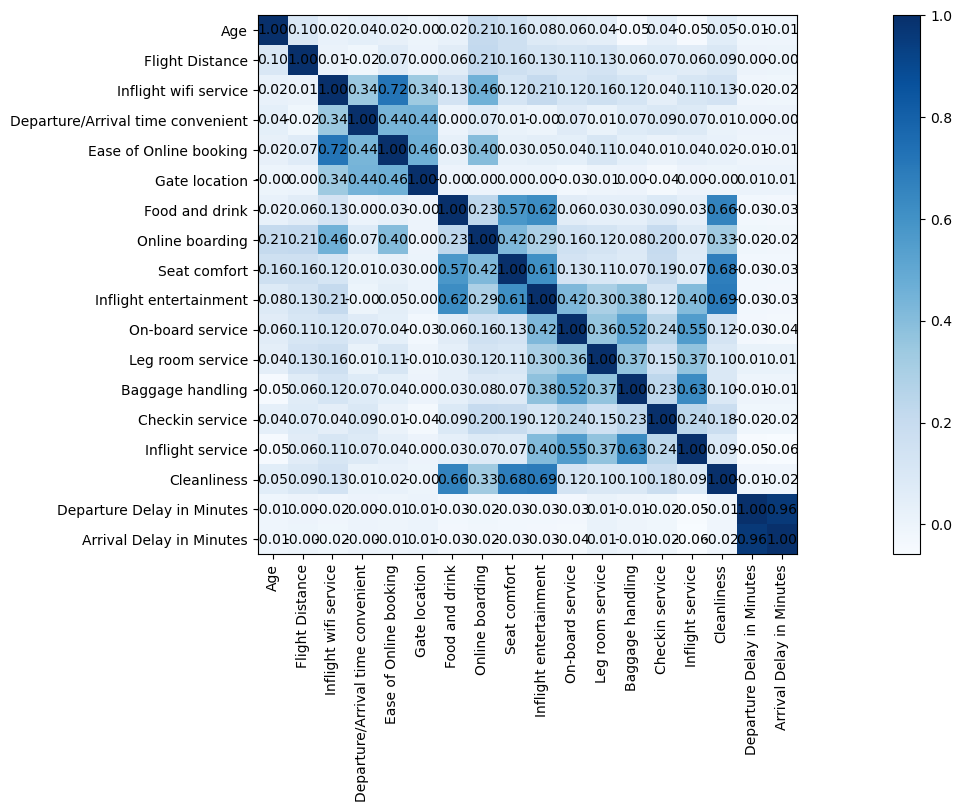

In [14]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(25, 7))
plt.imshow(corr, cmap='Blues')
plt.colorbar()

# Adding x and y ticks for better readability
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

# Adding the correlation values inside the matrix
for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()


- There is a strong positive correlation between 'Departure Delay in Minutes' and 'Arrival Delay in Minutes', We can remove it they both can be impact as a multicolnearity.
- Also, some of the features correlated are 'Food and drink' & 'Cleanliness', 'Seat comfort' & 'Cleanliness' and many more.

In [15]:
df.Gender.value_counts(normalize=True)*100

Gender
Female    50.745881
Male      49.254119
Name: proportion, dtype: float64

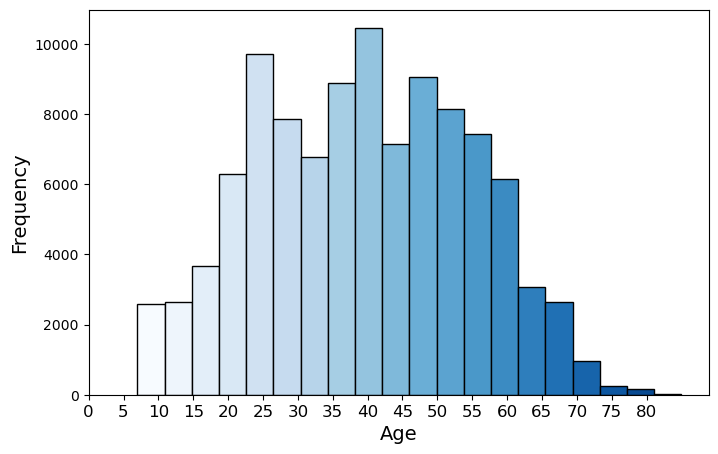

In [16]:
plt.figure(figsize=(8, 5))
n, bins, patches = plt.hist(df["Age"], bins=20, edgecolor='black')
cmap = plt.get_cmap('Blues')
norm = plt.Normalize(vmin=min(bins), vmax=max(bins))

for patch, bin_value in zip(patches, bins):
    color = cmap(norm(bin_value))
    patch.set_facecolor(color)
    
plt.xticks(ticks=np.arange(0, df["Age"].max(), step=5), fontsize=12)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)


plt.show()


In [17]:
df.Age.describe()

count    103904.000000
mean         39.379706
std          15.114964
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

In [18]:
cut_series = pd.cut(df['Age'], bins=[5, 15, 30, 45, 60, 75, 85], labels=['5-15', '15-30', '30-45', '45-60', '60-75', '75-85'])
value_counts = cut_series.value_counts()

percentage_distribution = (value_counts / df['Age'].shape[0]).mul(100).round(2)

print("Distribution (Counts):")
print(value_counts)
print("\nDistribution (Percentage):")
print(percentage_distribution)



Distribution (Counts):
Age
30-45    33252
45-60    29919
15-30    26709
60-75     7674
5-15      6048
75-85      302
Name: count, dtype: int64

Distribution (Percentage):
Age
30-45    32.00
45-60    28.79
15-30    25.71
60-75     7.39
5-15      5.82
75-85     0.29
Name: count, dtype: float64


In [19]:
df.satisfaction.value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

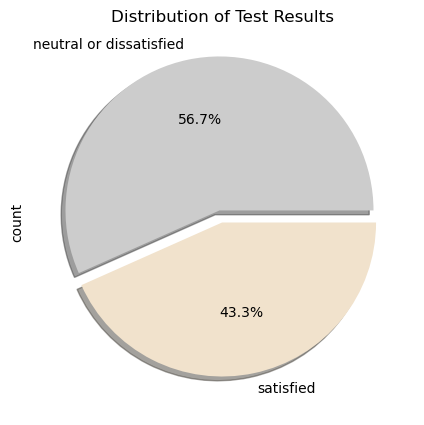

In [20]:
colors = plt.get_cmap('Pastel2_r').colors

df.satisfaction.value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(7, 5),
    title='Distribution of Test Results',
    explode=(0.08, 0),
    shadow=True,
    colors=colors
)
plt.show()


In [21]:
df["Customer Type"].value_counts()

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

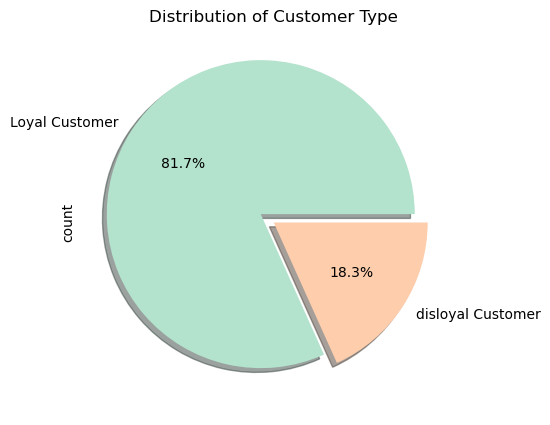

In [22]:
colors = plt.get_cmap('Pastel2').colors
df["Customer Type"].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(10, 5),
    title='Distribution of Customer Type',
    explode=(0.10, 0),
    shadow=True,
    colors=colors
)
plt.show()                                     

In [23]:
df["Type of Travel"].value_counts()

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

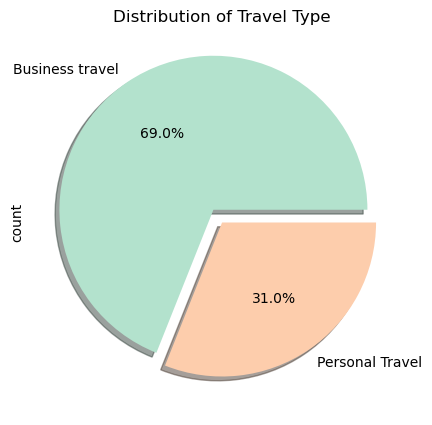

In [24]:
colors = plt.get_cmap('Pastel2').colors
df["Type of Travel"].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(10, 5),
    title='Distribution of Travel Type',
    explode=(0.10, 0),
    shadow=True,
    colors=colors
)
plt.show()       

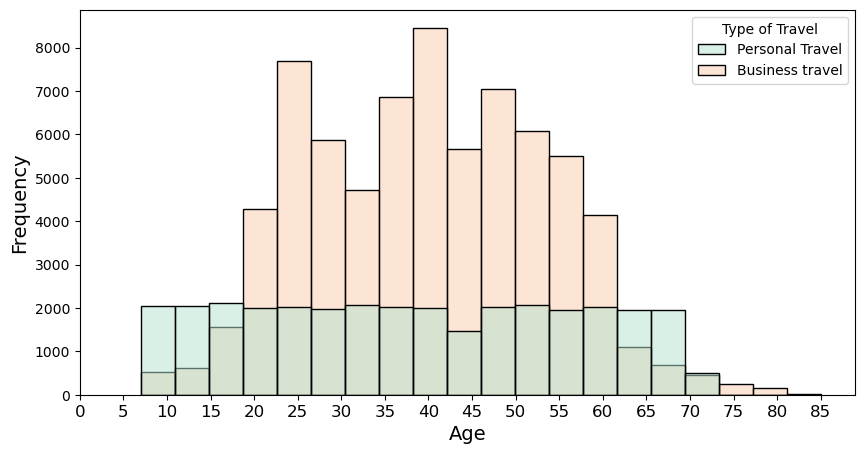

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="Age", bins=20, edgecolor='black', hue="Type of Travel", palette="Pastel2")
plt.xticks(ticks=np.arange(0,df["Age"].max()+5, step=5), fontsize=12)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.show()

In [27]:
cut_series = pd.cut(df['Age'], bins=[5, 15, 30, 45, 60, 75, 85], labels=['5-15', '15-30', '30-45', '45-60', '60-75', '75-85'])
distribution_counts = pd.crosstab( cut_series , df["Type of Travel"])
distribution_percentages = pd.crosstab(cut_series, df["Type of Travel"], normalize='columns').mul(100).round(2)

print("Distribution (Counts):")
print(distribution_counts)
print("\nDistribution (Percentages):")
print(distribution_percentages)

Distribution (Counts):
Type of Travel  Business travel  Personal Travel
Age                                             
5-15                       1415             4633
15-30                     19145             7564
30-45                     25670             7582
45-60                     22366             7553
60-75                      2757             4917
75-85                       302                0

Distribution (Percentages):
Type of Travel  Business travel  Personal Travel
Age                                             
5-15                       1.97            14.37
15-30                     26.72            23.45
30-45                     35.82            23.51
45-60                     31.21            23.42
60-75                      3.85            15.25
75-85                      0.42             0.00


In [28]:
df.groupby("Customer Type")["Type of Travel"].value_counts(normalize=True).mul(100).unstack()

Type of Travel,Business travel,Personal Travel
Customer Type,,
Loyal Customer,62.218716,37.781284
disloyal Customer,99.135978,0.864022


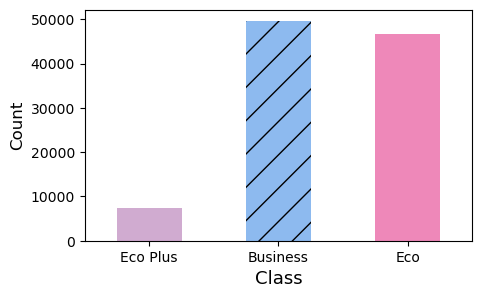

In [29]:
plt.figure(figsize=(5, 3))
ax =sns.countplot(x='Class', data=df, palette={"Eco": "#FF77B8", "Business": "#7DB9FF", "Eco Plus": "#D6A5D6"}, width=0.5)
plt.xlabel("Class", fontsize=13)
plt.ylabel("Count", fontsize=12)
middle_index = len(ax.patches) // 2
ax.patches[middle_index].set_hatch('/')  

plt.show()

In [27]:
df.groupby(["Type of Travel"])["Class"].value_counts(normalize=True).mul(100).round(2).unstack()


Class,Business,Eco,Eco Plus
Type of Travel,,,
Business travel,66.30,28.27,5.43
Personal Travel,6.69,82.14,11.18


#### We Observe that 
* The majority of business trips are taken in Business Class
* Eco Class is the most popular choice for personal trips


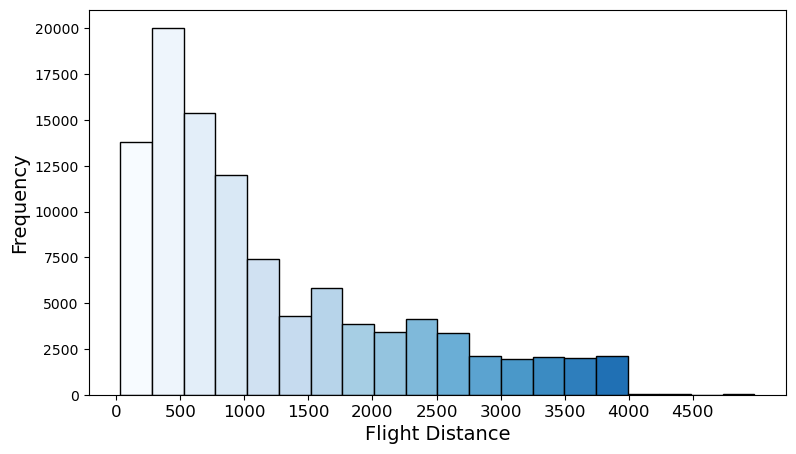

In [30]:
plt.figure(figsize=(9, 5))
n, bins, patches = plt.hist(df["Flight Distance"], bins=20, edgecolor='black')
cmap = plt.get_cmap('Blues')
norm = plt.Normalize(vmin=min(bins), vmax=max(bins))

for patch, bin_value in zip(patches, bins):
    color = cmap(norm(bin_value))
    patch.set_facecolor(color)
    
plt.xticks(ticks=np.arange(0, df["Flight Distance"].max(), step=500), fontsize=12)
plt.xlabel("Flight Distance", fontsize=14)
plt.ylabel("Frequency", fontsize=14)


plt.show()


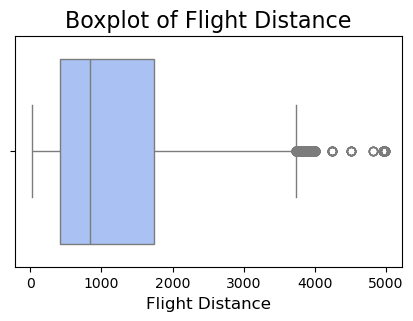

In [31]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df["Flight Distance"], color="#9DBDFF")
plt.xlabel("Flight Distance", fontsize=12)
plt.title("Boxplot of Flight Distance", fontsize=16)
plt.show()

In [32]:
cut_series = pd.cut(df['Flight Distance'], bins=[0, 1000, 2000, 3000, 4000, 5000], labels=['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000'])
value_counts = cut_series.value_counts()

percentage_distribution = (value_counts / df['Flight Distance'].shape[0]).mul(100).round(2)

print("Distribution (Counts):")
print(value_counts)
print("\nDistribution (Percentage):")
print(percentage_distribution)


Distribution (Counts):
Flight Distance
0-1000       60065
1000-2000    22426
2000-3000    13148
3000-4000     8207
4000-5000       58
Name: count, dtype: int64

Distribution (Percentage):
Flight Distance
0-1000       57.81
1000-2000    21.58
2000-3000    12.65
3000-4000     7.90
4000-5000     0.06
Name: count, dtype: float64


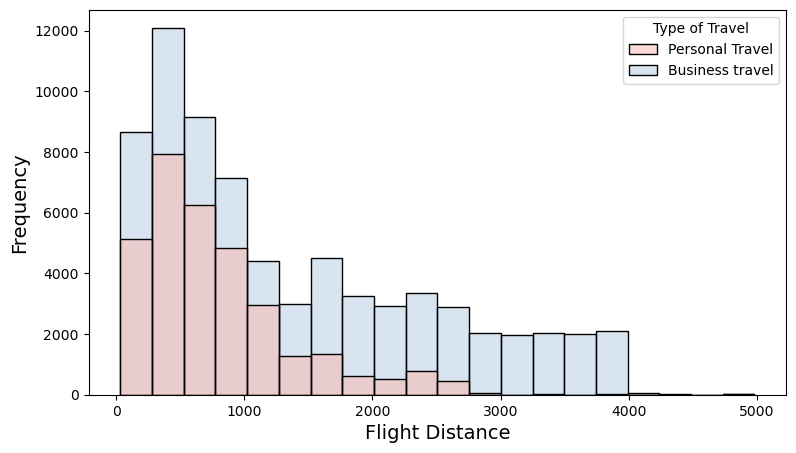

In [33]:
plt.figure(figsize=(9, 5))
sns.histplot(data=df, x="Flight Distance", bins=20, edgecolor='black', hue="Type of Travel", palette="Pastel1")
plt.xlabel("Flight Distance", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.show()


## Insights from the chart
* By focusing on specific travel distances, you can target particular customer segments more effectively.
* Provide limited-time discounts for customers who book flights to a destination just beyond their typical range, motivating them to explore new locations.

In [34]:
cut_series = pd.cut(df['Flight Distance'], bins=[0, 1000, 2000, 3000, 4000, 5000], labels=['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000'])
distribution_counts = pd.crosstab(cut_series, df['Cleanliness'].isin([1, 2]), ).rename(columns={True: "   Cleanliness 1-2", False: "Total"})

distribution_percentages = pd.crosstab(cut_series, df['Cleanliness'].isin([1, 2]), normalize='columns').mul(100).round(2).rename(columns={True: "     Cleanliness 1-2", False: "Total"})

print("Distribution (Counts):")
print(distribution_counts)
print("\nDistribution (Percentages):")
print(distribution_percentages)

Distribution (Counts):
Cleanliness      Total     Cleanliness 1-2
Flight Distance                           
0-1000           40937               19128
1000-2000        16397                6029
2000-3000        10302                2846
3000-4000         6776                1431

Distribution (Percentages):
Cleanliness      Total       Cleanliness 1-2
Flight Distance                             
0-1000           55.01                 64.99
1000-2000        22.04                 20.48
2000-3000        13.84                  9.67
3000-4000         9.11                  4.86


In [34]:
df.select_dtypes(exclude=['int64','float64']).columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [35]:
# Preparing the dataset for model training
X = df.drop('satisfaction', axis=1)  
y = df['satisfaction']  

In [36]:
# One-hot encoding for all features
X = pd.get_dummies(X,columns=['Gender','Customer Type','Type of Travel'],drop_first=True, dtype=int)

In [37]:
class_mapping = {
    "Eco": 0,
    "Eco Plus": 1,
    "Business": 2
}
X['Class'] = X['Class'].map(class_mapping)

In [38]:
X.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,13,1,460,3,4,3,1,5,3,5,...,3,4,4,5,5,25,18.0,1,0,1
1,25,2,235,3,2,3,3,1,3,1,...,5,3,1,4,1,1,6.0,1,1,0
2,26,2,1142,2,2,2,2,5,5,5,...,3,4,4,4,5,0,0.0,0,0,0
3,25,2,562,2,5,5,5,2,2,2,...,5,3,1,4,2,11,9.0,0,0,0
4,61,2,214,3,3,3,3,4,5,5,...,4,4,3,3,3,0,0.0,1,0,0


In [39]:
X.shape

(103904, 22)

In [40]:
label_encorder = LabelEncoder()
y = label_encorder.fit_transform(y)

In [41]:
# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
scaler = StandardScaler()

X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [43]:
X_train_scaled.shape

(83123, 22)

### Logistic Regression Model

In [44]:
# initializing the model
log_reg = LogisticRegression(random_state=42)

# Training the model
log_reg.fit(X_train,y_train)

#making Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluating the Model's Accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg * 100:.2f}%')

# Classification Report:
print(classification_report(y_test, y_pred_log_reg))



Logistic Regression Accuracy: 79.99%
              precision    recall  f1-score   support

           0       0.85      0.79      0.82     11713
           1       0.75      0.82      0.78      9068

    accuracy                           0.80     20781
   macro avg       0.80      0.80      0.80     20781
weighted avg       0.80      0.80      0.80     20781



### k-NNClassifier

In [45]:
# Initializing the k-NN model with k=5 
knn = KNeighborsClassifier(n_neighbors=5)

# Training the model
knn.fit(X_train, y_train)

# Making Predictions
y_pred_knn = knn.predict(X_test)

# Evaluating the Model's Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'k-NN Accuracy: {accuracy_knn * 100:.2f}%')

# Classification Report:
print(classification_report(y_test, y_pred_knn))

k-NN Accuracy: 74.95%
              precision    recall  f1-score   support

           0       0.76      0.81      0.78     11713
           1       0.73      0.67      0.70      9068

    accuracy                           0.75     20781
   macro avg       0.75      0.74      0.74     20781
weighted avg       0.75      0.75      0.75     20781



### Decision Tree Classifier

In [46]:
# Initializing the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Training the model
dt_classifier.fit(X_train, y_train)

# Making Predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluating the Model's Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt * 100:.2f}%')

# Classification Report:
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 94.69%
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11713
           1       0.94      0.94      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



### Random Forest Classifier

In [47]:
# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)

# Training the model
rf_classifier.fit(X_train, y_train)

# Making Predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluating the Model's Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')

# Classification Report:
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 96.20%
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



### XGBoost Classifier

In [49]:
# Initializing the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Training the model
xgb_classifier.fit(X_train_scaled, y_train)

# Making Predictions
y_pred_xgb = xgb_classifier.predict(X_train_scaled)

accuracy_train_xgb = accuracy_score(y_train, y_pred_xgb)

# Evaluating the Model's Accuracy on training data
accuracy_test_xgb = accuracy_score(y_train, y_pred_xgb)
print(f'XGBoost Accuracy on training data: {accuracy_xgb * 100:.2f}%')


# Generate classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_train, y_pred_xgb))

print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_pred_xgb))


XGBoost Accuracy on training data: 96.13%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     47166
           1       0.98      0.96      0.97     35957

    accuracy                           0.98     83123
   macro avg       0.98      0.97      0.98     83123
weighted avg       0.98      0.98      0.98     83123


Confusion Matrix:
[[46598   568]
 [ 1411 34546]]


In [50]:
cm = confusion_matrix(y_train, y_pred_xgb)
cm

array([[46598,   568],
       [ 1411, 34546]], dtype=int64)

In [51]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=xgb_classifier.classes_)

In [52]:
f1Score = f1_score(y_train,y_pred_xgb)
f1Score

0.9721546059574229

In [53]:
recall = recall_score(y_train, y_pred_xgb)
recall

0.9607586839836472

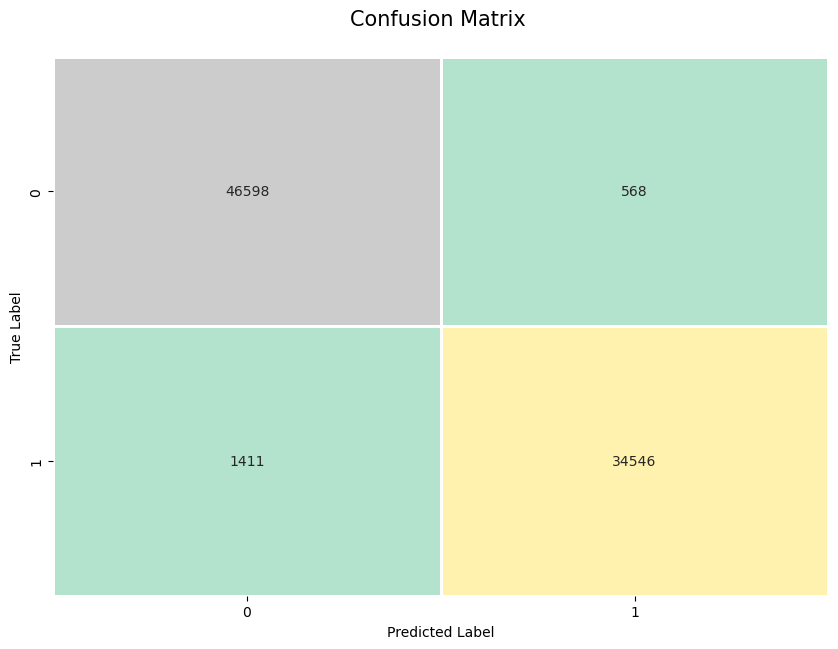

In [55]:
cm = confusion_matrix(y_train, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Pastel2', cbar=False, linewidths=2, linecolor='white')

plt.title("Confusion Matrix \n", fontsize=15)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Shape of y_test: (20781,)
Shape of y_pred_prob: (20781,)
ROC AUC: 0.9948452778368516


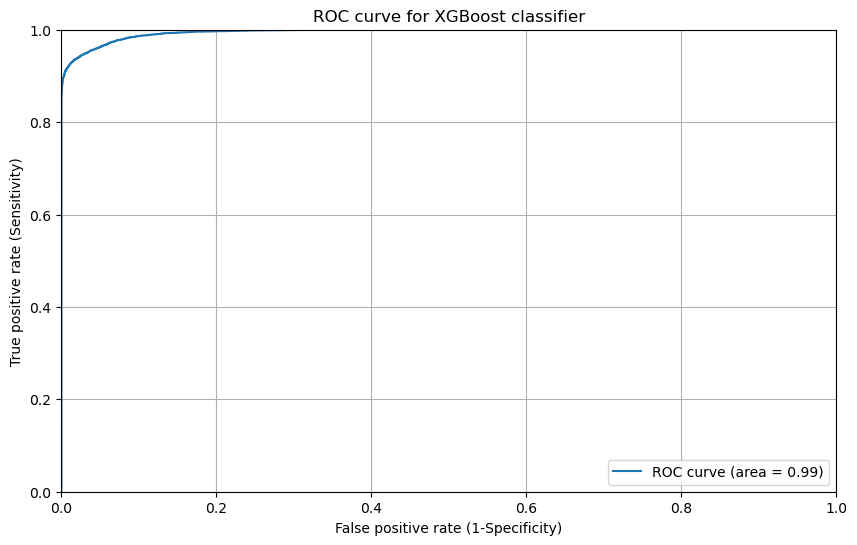

In [56]:
y_pred_prob = xgb_classifier.predict_proba(X_test_scaled)[:, 1]

# Verify shapes of y_test and y_pred_prob
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred_prob: {y_pred_prob.shape}")

if len(y_test) != len(y_pred_prob):
    raise ValueError("The lengths of y_test and y_pred_prob do not match!")

# Compute ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC: {roc_auc}")

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for XGBoost classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [57]:
# Save the trained model and encoders
import pickle

# Save the xgb_classifier
with open('xgb_classifier.pkl', 'wb') as model_file:
    pickle.dump(xgb_classifier, model_file)

# Save the scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save feature names
with open('feature_names.pkl', 'wb') as feature_names_file:
    pickle.dump(X_train.columns.tolist(), feature_names_file)



### ML Flow

In [67]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Set the tracking URI to a local file system
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Set the experiment name
experiment_name = "Passenger_Satisfaction_Prediction"
mlflow.set_experiment(experiment_name)

# Enable autologging
mlflow.autolog()

# Function to save and log confusion matrix as an artifact
def log_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Satisfied", "Satisfied"], yticklabels=["Not Satisfied", "Satisfied"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()

    # Save the confusion matrix
    cm_filename = f"{model_name}_confusion_matrix.png"
    plt.savefig(cm_filename)
    plt.close()

    # Log confusion matrix as an artifact
    mlflow.log_artifact(cm_filename)

    # Clean up saved file
    os.remove(cm_filename)

# Function to log models and metrics to MLflow
def log_model_to_mlflow(model, X_train, X_test, y_train, y_test, model_name):
    with mlflow.start_run():
        # Log model name as a parameter
        mlflow.log_param('model', model_name)

        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate and log metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        mlflow.log_metric('accuracy', accuracy)
        mlflow.log_metric('precision', precision)
        mlflow.log_metric('recall', recall)
        mlflow.log_metric('f1_score', f1)

        # Log the confusion matrix as an artifact
        log_confusion_matrix(y_test, y_pred, model_name)

        # Log the trained model to the registry
        mlflow.sklearn.log_model(model, f'{model_name}_model', registered_model_name=model_name)

        print(f"Logged {model_name} to MLflow with accuracy: {accuracy:.2f}, precision: {precision:.2f}, recall: {recall:.2f}, F1-score: {f1:.2f}")

# Models:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Instantiate models
log_reg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
xgb_clf = xgb.XGBClassifier(random_state=42)

# Log each model using the function
log_model_to_mlflow(log_reg, X_train, X_test, y_train, y_test, 'Logistic Regression')
log_model_to_mlflow(knn, X_train, X_test, y_train, y_test, 'KNN')
log_model_to_mlflow(rf, X_train, X_test, y_train, y_test, 'Random Forest')
log_model_to_mlflow(dt, X_train, X_test, y_train, y_test, 'Decision Tree')
log_model_to_mlflow(xgb_clf, X_train, X_test, y_train, y_test, 'XGBoost')



2025/01/27 18:27:58 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/01/27 18:27:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/01/27 18:27:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/01/27 18:28:00 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - err

Logged Logistic Regression to MLflow with accuracy: 0.81, precision: 0.76, recall: 0.81, F1-score: 0.79
🏃 View run melodic-shrimp-739 at: http://127.0.0.1:5000/#/experiments/768035648492819677/runs/7131a13e619f4dd6a6341937ea1acc3d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/768035648492819677


2025/01/27 18:30:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'KNN' already exists. Creating a new version of this model...
2025/01/27 18:30:36 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: KNN, version 3
Created version '3' of model 'KNN'.


Logged KNN to MLflow with accuracy: 0.75, precision: 0.74, recall: 0.67, F1-score: 0.70
🏃 View run melodic-carp-541 at: http://127.0.0.1:5000/#/experiments/768035648492819677/runs/550e6166e964499eb618fcde19c2c805
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/768035648492819677


2025/01/27 18:31:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Random Forest' already exists. Creating a new version of this model...
2025/01/27 18:31:40 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest, version 3
Created version '3' of model 'Random Forest'.


Logged Random Forest to MLflow with accuracy: 0.96, precision: 0.98, recall: 0.94, F1-score: 0.96
🏃 View run tasteful-wasp-925 at: http://127.0.0.1:5000/#/experiments/768035648492819677/runs/12dc58d59a9e4ecd9ea73d06433ebf09
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/768035648492819677


2025/01/27 18:31:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Decision Tree' already exists. Creating a new version of this model...
2025/01/27 18:31:57 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Decision Tree, version 3
Created version '3' of model 'Decision Tree'.


Logged Decision Tree to MLflow with accuracy: 0.95, precision: 0.94, recall: 0.94, F1-score: 0.94
🏃 View run whimsical-quail-114 at: http://127.0.0.1:5000/#/experiments/768035648492819677/runs/646619b455f2490682003d5a641700fd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/768035648492819677


2025/01/27 18:32:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'XGBoost' already exists. Creating a new version of this model...
2025/01/27 18:32:09 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost, version 3


Logged XGBoost to MLflow with accuracy: 0.96, precision: 0.98, recall: 0.94, F1-score: 0.96
🏃 View run puzzled-ray-120 at: http://127.0.0.1:5000/#/experiments/768035648492819677/runs/3ecfece4032346508325dc0231b7424b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/768035648492819677


Created version '3' of model 'XGBoost'.
